In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import ds_fun
import wrangle as w
import explore as e

Source:
- https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification?select=predictive_maintenance.csv

Origionally from:
- https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [2]:
df = pd.read_csv('predictive_maintenance.csv')

- No null values
- shape (10000, 10)
- Possible columns:
    - Delta between air and process temp
    - torque to wear ratio
    - temp to torque
    - speed to torque hue by wear

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df['Temp Delta [K]'] = df['Process temperature [K]'] - df['Air temperature [K]']

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
Temp Delta [K],10000.0,10.00063,1.001094,7.6,9.30,9.8,11.00,12.1


In [6]:
train, val, test = w.train_validate(df, stratify_col = 'Target')

In [7]:
train.shape[0] + val.shape[0] + test.shape[0] == df.shape[0]

True

In [8]:
target_col = 'Target'
alpha=0.05

In [9]:
no_failures = train[train['Target'] == 0]
failures = train[train['Target'] == 1]

H0: No difference in the means
HA: There is a difference in the means

In [10]:
stat, p_value = stats.ttest_ind(failures['Air temperature [K]'], no_failures['Air temperature [K]'], nan_policy='omit', equal_var = False)
print(stat, p_value)

5.415721300931324 1.6290730848282003e-07


In [11]:
if p_value/2 < alpha:
    print("We reject the null hypothesis")
elif stat > 0:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [12]:
stat, p_value = stats.ttest_ind(failures['Tool wear [min]'], no_failures['Tool wear [min]'], nan_policy='omit', equal_var = False)
print(stat, p_value)

7.841061704097693 2.1072272083843136e-13


In [13]:
if p_value/2 < alpha:
    print("We reject the null hypothesis")
elif stat > 0:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


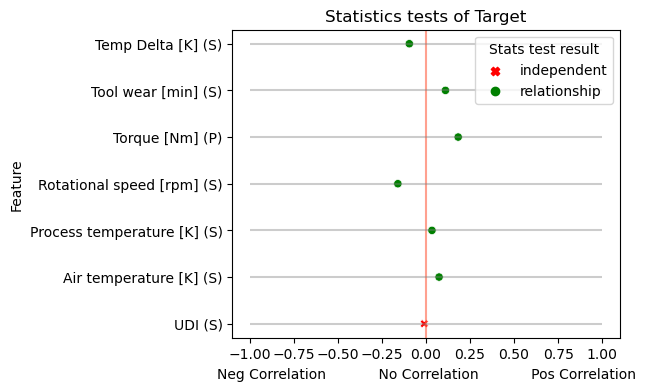

In [14]:
e.correlation_test(train, target_col)

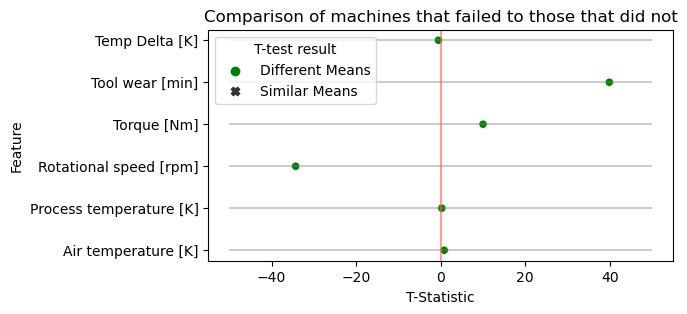

In [15]:
e.t_test_cats(train, target_col)

Takeaways:
 - No strong correlations
 - Strongest seems to be torque (pos corr), tool wear (pos corr), rotational speed (neg corr) and temp delta (neg corr).
 - All features have a statistically relevent relationship with failure except UDI.

(array([   6.,   91.,  347.,  995., 1560., 1629.,  968.,  325.,   71.,
           8.]),
 array([ 3.8 , 11.04, 18.28, 25.52, 32.76, 40.  , 47.24, 54.48, 61.72,
        68.96, 76.2 ]),
 <BarContainer object of 10 artists>)

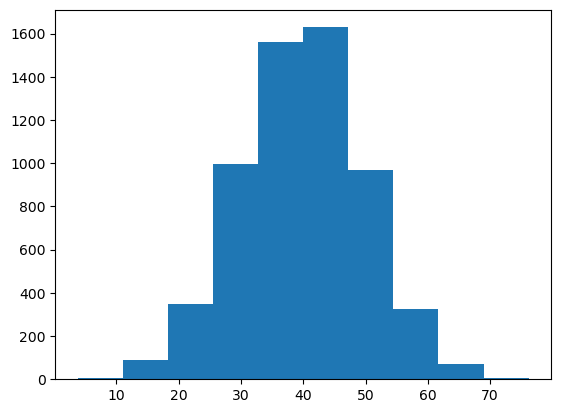

In [16]:
plt.hist(train['Torque [Nm]'])

(array([ 347., 2749., 1993.,  582.,  199.,   72.,   28.,   12.,   15.,
           3.]),
 array([1168. , 1339.8, 1511.6, 1683.4, 1855.2, 2027. , 2198.8, 2370.6,
        2542.4, 2714.2, 2886. ]),
 <BarContainer object of 10 artists>)

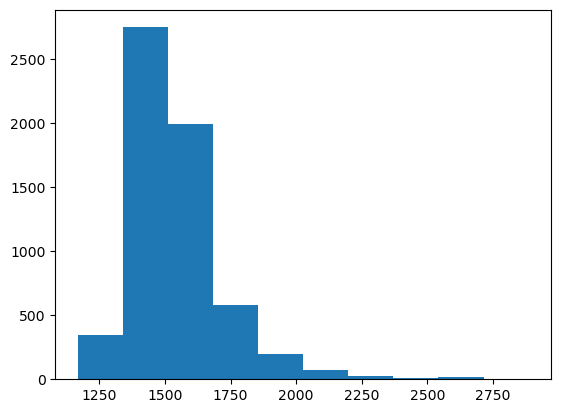

In [17]:
plt.hist(train['Rotational speed [rpm]'])

(array([  85.,  247.,  867.,  963.,  699., 1139.,  713.,  710.,  318.,
         259.]),
 array([295.3 , 296.22, 297.14, 298.06, 298.98, 299.9 , 300.82, 301.74,
        302.66, 303.58, 304.5 ]),
 <BarContainer object of 10 artists>)

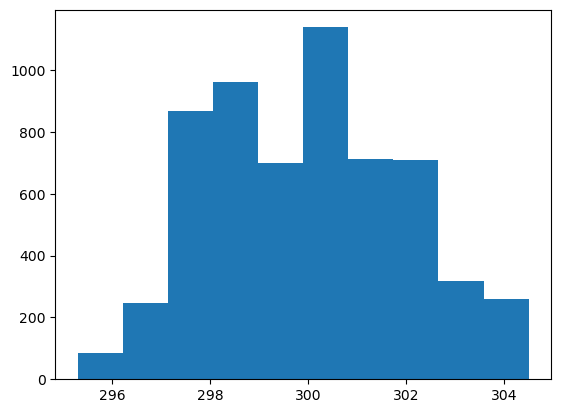

In [18]:
plt.hist(train['Air temperature [K]'])

(array([  56.,   75.,  497., 1021., 1021., 1038., 1187.,  669.,  294.,
         142.]),
 array([305.7 , 306.51, 307.32, 308.13, 308.94, 309.75, 310.56, 311.37,
        312.18, 312.99, 313.8 ]),
 <BarContainer object of 10 artists>)

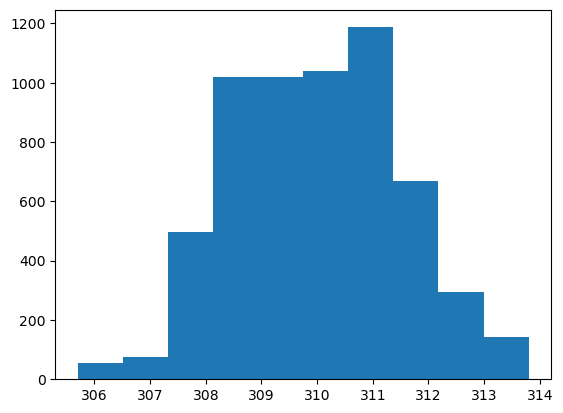

In [19]:
plt.hist(train['Process temperature [K]'])

(array([746., 686., 630., 673., 625., 682., 683., 693., 516.,  66.]),
 array([  0. ,  24.6,  49.2,  73.8,  98.4, 123. , 147.6, 172.2, 196.8,
        221.4, 246. ]),
 <BarContainer object of 10 artists>)

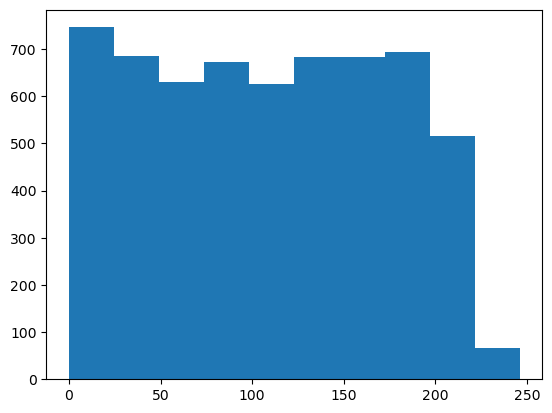

In [20]:
plt.hist(train['Tool wear [min]'])

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

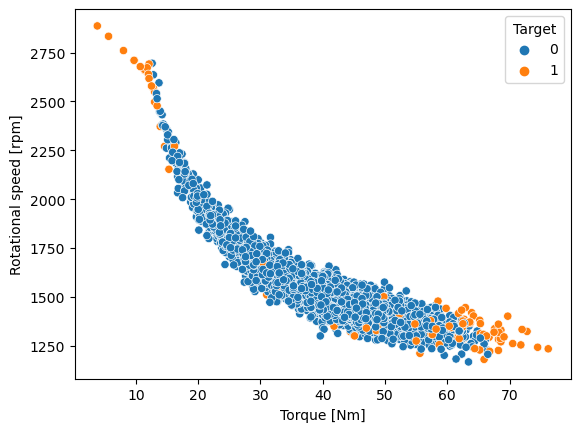

In [21]:
sns.scatterplot(data = train, x = 'Torque [Nm]', y= 'Rotational speed [rpm]', hue = 'Target')

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Rotational speed [rpm]'>

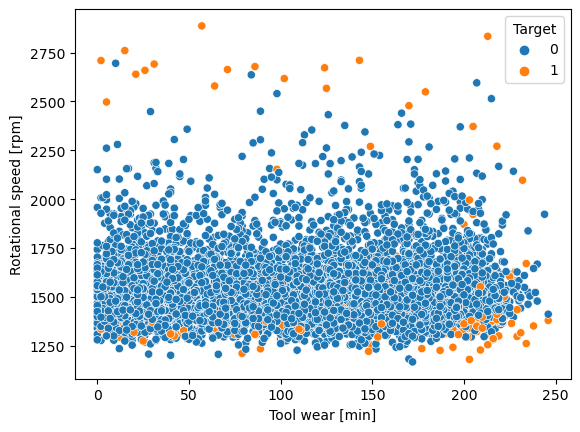

In [22]:
sns.scatterplot(data = train, x = 'Tool wear [min]', y= 'Rotational speed [rpm]', hue = 'Target')

Takeaway:
- High and low torque appear to affect failure.
- High speed might affect failure rates.

In [23]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type', 'Temp Delta [K]'],
      dtype='object')

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Tool wear [min]'>

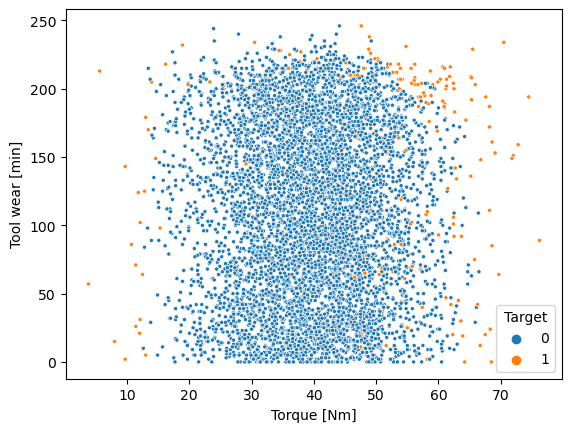

In [24]:
sns.scatterplot(data = train, x = 'Torque [Nm]', y= 'Tool wear [min]', hue = 'Target', marker = '.')

Takeaway:
- Small failure cluster around high torque and high tool wear minutes.

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Air temperature [K]'>

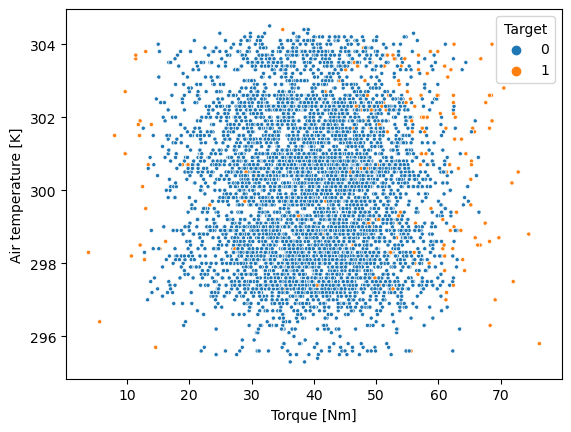

In [25]:
sns.scatterplot(data = train, x = 'Torque [Nm]', y= 'Air temperature [K]', hue = 'Target', marker = '.')

Takeaways:
- Air and Process temp is very similar when compared to torque. It doesn't appear to be relevent.

In [26]:
high_quality = train[train['Type'] == 'H']
med_quality = train[train['Type'] == 'M']
low_quality = train[train['Type'] == 'L']

In [27]:
train[train['Type'] == 'H'].describe().T - train[train['Type'] == 'L'].describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,-2931.0,-166.626857,145.852385,9.0,-387.25,-242.5,-114.000,4.0
Air temperature [K],-2931.0,-0.158294,0.032089,0.0,-0.10,-0.4,-0.150,-0.3
Process temperature [K],-2931.0,-0.124713,-0.001372,0.0,-0.10,-0.3,-0.100,-0.2
Rotational speed [rpm],-2931.0,-6.011739,-6.315357,62.0,-3.00,-5.0,-9.000,-250.0
Torque [Nm],-2931.0,0.274258,-0.327550,9.0,0.50,0.8,0.125,1.0
Tool wear [min],-2931.0,-2.697096,-1.418675,0.0,0.00,-4.0,-7.500,0.0
Target,-2931.0,-0.016371,-0.045278,0.0,0.00,0.0,0.000,0.0
Temp Delta [K],-2931.0,0.033581,0.019868,0.0,0.00,0.1,0.000,-0.1


<AxesSubplot:xlabel='Tool wear [min]', ylabel='Rotational speed [rpm]'>

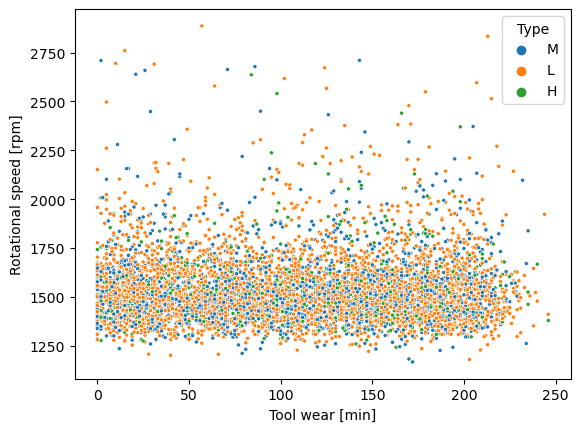

In [28]:
sns.scatterplot(data = train, y = 'Rotational speed [rpm]', x= 'Tool wear [min]', hue = 'Type', marker = '.')

Takeaway:
- Type appears to affect Rotational speed and Tool wear the most.
- I don't see it on a scatter plot very well.